## Titanic: Machine Learning from Disaster

https://www.kaggle.com/c/titanic/

### Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

### Data Describe

In [3]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
364,365,0,3,"O'Brien, Mr. Thomas",male,NaN,1,0,370365,15.50,NaN,Q
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NaN,C
555,556,0,1,"Wright, Mr. George",male,62.0,0,0,113807,26.55,NaN,S
470,471,0,3,"Keefe, Mr. Arthur",male,NaN,0,0,323592,7.25,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.00,C23 C25 C27,S


수치형 데이터 : Age, Fare, SibSp, Parch 

범주형 데이터 : Survived, Sex, Embarked, Pclass

문자형 데이터 : Ticket, Cabin

In [4]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Meanwell, Miss. (Marion Ogden)",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Cabin은 손실 값이 너무 많으므로 사용하기 부적합한 feature이다.

In [5]:
print(pd.isnull(train_data).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### 생각할 점

여자와 어린 사람이 생존할 확률이 더 높지 않을까?
높은 class의 사람들이 생존할 확률이 더 높지 않을까?

동행한 사람의 수 (sibSP, parch)가 생존할 확률과 관련이 있을까?

### Features

성별에 따른 생존율

# of female survived :  0.7420382165605095
# of male survived :  0.18890814558058924


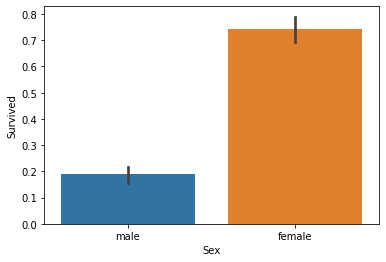

In [6]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
print("# of female survived : ", sum(women)/len(women))

men = train_data.loc[train_data.Sex == 'male']["Survived"]
print("# of male survived : ", sum(men)/len(men))

sns.barplot(x='Sex', y='Survived', data=train_data)

pClass에 따른 생존율

In [7]:
np.unique(train_data.Pclass)

array([1, 2, 3])

# of Pclass 1 survived :  0.6296296296296297
# of Pclass 2 survived :  0.47282608695652173
# of Pclass 3 survived :  0.24236252545824846


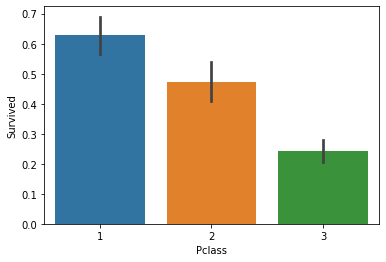

In [8]:
pc1 = train_data.loc[train_data.Pclass == 1]["Survived"]
print("# of Pclass 1 survived : ", sum(pc1)/len(pc1))

pc2 = train_data.loc[train_data.Pclass == 2]["Survived"]
print("# of Pclass 2 survived : ", sum(pc2)/len(pc2))

pc3 = train_data.loc[train_data.Pclass == 3]["Survived"]
print("# of Pclass 3 survived : ", sum(pc3)/len(pc3))

sns.barplot(x='Pclass', y='Survived', data=train_data)

동행인의 수에 따른 생존율

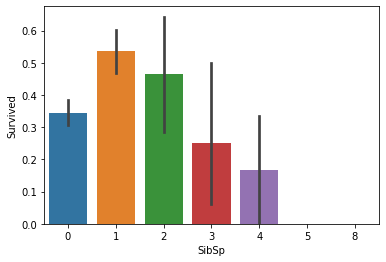

In [9]:
sns.barplot(x='SibSp', y='Survived', data=train_data)

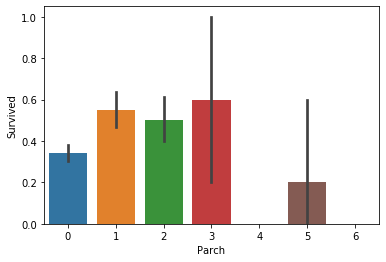

In [10]:
sns.barplot(x='Parch', y='Survived', data=train_data)

나이에 따른 생존율

In [11]:
np.unique(train_data.Age)

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,

어느정도 묶어서 그룹으로 나타낼 필요가 있음.

In [30]:
#nan 대체
train_data["Age"] = train_data["Age"].fillna(-0.5)
test_data["Age"] = test_data["Age"].fillna(-0.5)

#적당한 바운더리 설정, 라벨 부여
boundary = [-1, 0, 6, 13, 18, 25, 35, 61, np.max(train_data.Age)+1]
age_group = ['nan', 'baby', 'Elementary', 'student', 'big_student', 'adult', 'middle age', 'senior']


train_data['AgeGroup'] = pd.cut(train_data["Age"], boundary, labels = age_group)
test_data['AgeGroup'] = pd.cut(train_data["Age"], boundary, labels = age_group)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

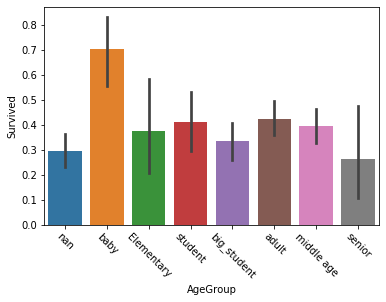

In [31]:
sns.barplot(x='AgeGroup', y='Survived', data=train_data)
plt.xticks(rotation = - 45 )

cabin이 기록되어 있는 사람과 그렇지 않은 사람의 생존율

# of people recorded :  0.6666666666666666
# of people not recorded :  0.29985443959243085


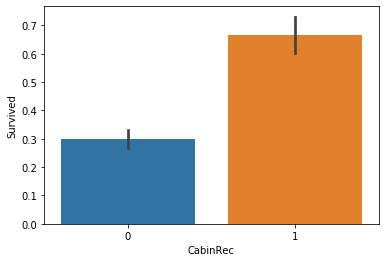

In [14]:
train_data["CabinRec"] = (train_data["Cabin"].notnull().astype('int'))
test_data["CabinRec"] = (test_data["Cabin"].notnull().astype('int'))

rec = train_data.loc[train_data.CabinRec==1]['Survived']
print("# of people recorded : ", sum(rec)/len(rec))

notRec = train_data.loc[train_data.CabinRec==0]['Survived']
print("# of people not recorded : ", sum(notRec)/len(notRec))

sns.barplot(x='CabinRec', y='Survived', data=train_data)

### data mapping 

Embarked

In [16]:
train_data.Embarked.isnull().sum()

2

In [17]:
print("# of S :", len(train_data.loc[train_data.Embarked=='S'])/len(train_data.Embarked))
print("# of C :", len(train_data.loc[train_data.Embarked=='C'])/len(train_data.Embarked))
print("# of Q :", len(train_data.loc[train_data.Embarked=='Q'])/len(train_data.Embarked))

# of S : 0.7227833894500562
# of C : 0.18855218855218855
# of Q : 0.08641975308641975


In [18]:
train_data = train_data.fillna({'Embarked':'S'})

In [19]:
train_data.Embarked.isnull().sum()

0

sex

In [20]:
sex_mapping = {"male": 0, "female": 1}

train_data['Sex'] = train_data['Sex'].map(sex_mapping)
test_data['Sex'] = test_data['Sex'].map(sex_mapping)

train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinRec,CabinBool
851,852,0,3,"Svensson, Mr. Johan",0,74.0,0,0,347060,7.7750,NaN,S,senior,0,0
653,654,1,3,"O'Leary, Miss. Hanora ""Norah""",1,-0.5,0,0,330919,7.8292,NaN,Q,nan,0,0
79,80,1,3,"Dowdell, Miss. Elizabeth",1,30.0,0,0,364516,12.4750,NaN,S,adult,0,0
528,529,0,3,"Salonen, Mr. Johan Werner",0,39.0,0,0,3101296,7.9250,NaN,S,middle age,0,0
762,763,1,3,"Barah, Mr. Hanna Assi",0,20.0,0,0,2663,7.2292,NaN,C,big_student,0,0


Embarked

In [21]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked'] = train_data['Embarked'].map(embarked_mapping)
test_data['Embarked'] = test_data['Embarked'].map(embarked_mapping)

In [22]:
train_data = train_data.drop(['Name','Cabin'],axis=1)
test_data = test_data.drop(['Name', 'Cabin'], axis=1)

In [23]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,CabinRec,CabinBool
161,162,1,2,1,40.0,0,0,C.A. 33595,15.7500,1,middle age,0,0
828,829,1,3,0,-0.5,0,0,367228,7.7500,3,nan,0,0
460,461,1,1,0,48.0,0,0,19952,26.5500,1,middle age,1,1
176,177,0,3,0,-0.5,3,1,4133,25.4667,1,nan,0,0
135,136,0,2,0,23.0,0,0,SC/PARIS 2133,15.0458,2,big_student,0,0


### Learning Model

In [29]:
from sklearn.svm import SVC

y = train_data['Survived']

features = ["Pclass", "Sex", "SibSp", "CabinRec", "Embarked"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = SVC()  
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


/Users/seungohhan/.pyenv/versions/anaconda3-2019.07/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
